In [1]:
%matplotlib inline
import numpy as np
%matplotlib widget
!pwd

/users/renex/workspace/dataBox/pytorch/gh-pytorch-dlwpt-learning-path


In [2]:
from p2ch10.dsets import getCandidateInfoList, getCt, LunaDataset

# Set Luna DB path
'''
https://luna16.grand-challenge.org/Description/
annotations.csv: csv file that contains the annotations used as reference standard for the 'nodule detection' track
#annotation 1186
sampleSubmission.csv: an example of a submission file in the correct format
candidates.csv: the original set of candidates used for the LUNA16 workshop at ISBI2016. This file is kept for completeness, but should not be used, use candidates_V2.csv instead (see more info below).
#candidates 551065
'''
lunaDBPath = '/users/renex/workspace/dataBox/db/luna/db'

# lista de tuplas 
'''candidateInfo_list.append(CandidateInfoTuple(
                isNodule_bool,
                candidateDiameter_mm,
                series_uid,
                candidateCenter_xyz,
            ))
'''
candidateInfo_list = getCandidateInfoList(lunaDBPath, requireOnDisk_bool=False)
# is_nodule TRUE
positiveInfo_list = [x for x in candidateInfo_list if x[0]]
negativeInfo_list = [x for x in candidateInfo_list if not x[0]]
# diameter of malignant nodules
# The other list correspond to benign nodules
diameter_list = [x[1] for x in positiveInfo_list]

In [3]:
print('total: ',len(candidateInfo_list))
print('positive: ',len(positiveInfo_list))
perc = len(positiveInfo_list)/len(candidateInfo_list)*100
print('positive (%): ', perc)
 
print('negative: ',len(negativeInfo_list))


print(positiveInfo_list[0])
#print(negativeInfo_list[0])


total:  551065
positive:  1351
positive (%):  0.24516164154863765
negative:  549714
CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(75.7212243102, 92.8873310394, -119.270564052))


In [4]:
for i in range(0, len(diameter_list), 100):
    print('{:4}  {:4.1f} mm'.format(i, diameter_list[i]))

   0  32.3 mm
 100  21.6 mm
 200  17.3 mm
 300  13.1 mm
 400  10.4 mm
 500   8.6 mm
 600   7.4 mm
 700   6.5 mm
 800   6.0 mm
 900   5.5 mm
1000   5.1 mm
1100   4.6 mm
1200   4.0 mm
1300   0.0 mm


In [5]:
num = 5
print('Fist %d canditates'%(num))
for candidateInfo_tup in positiveInfo_list[:num]:
    print(candidateInfo_tup)
print('\n')
print('Last %d canditates'%(num))
for candidateInfo_tup in positiveInfo_list[-num:]:
    print(candidateInfo_tup)
print('\n')
print('Last a canditates with uid condition')
for candidateInfo_tup in positiveInfo_list:
    if candidateInfo_tup.series_uid.endswith('565'):
        print(candidateInfo_tup)

Fist 5 canditates
CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(75.7212243102, 92.8873310394, -119.270564052))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(75.2239949525, 79.4552680171, -121.430168337))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(70.8583605372, 73.3954511547, -104.818084289))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(69.4415285914, 76.6027472274, -121.084237546))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.025

In [6]:
import matplotlib.pyplot as plt

np.histogram(diameter_list)

#plt.hist(diameter_list, bins=5, range=[0, 40])
#H, bins = np.histogram(diameter_list, bins=5, range=[0, 40])
H, bins = np.histogram(diameter_list)
print(H)
print(bins)

[114 532 271 125  81  88  65  53   8  14]
[ 0.          3.22700302  6.45400605  9.68100907 12.9080121  16.13501512
 19.36201815 22.58902117 25.8160242  29.04302722 32.27003025]


In [7]:
from p2ch10.vis import findPositiveSamples, showCandidate

# limited to 100 samples
# Understand the difference btw the fn & previous results from positiveInfo_list
# Gives 110460 From a total of 551065
# The resulting positive samples would be less than the annotated, koz depends on the 
#datasets we have on out local disk
positiveSample_list = findPositiveSamples(lunaDBPath)
print(len(positiveSample_list))

2022-03-21 08:43:49,136 INFO     pid:487075 p2ch10.dsets:217:__init__ <p2ch10.dsets.LunaDataset object at 0x7f690bc06f70>: 110460 training samples


LunaDataset:  110460
110460
271


2022-03-21 08:43:49,170 INFO     pid:487075 p2ch10.dsets:217:__init__ <p2ch10.dsets.LunaDataset object at 0x7f690bc06eb0>: 939 training samples




1.3.6.1.4.1.14519.5.2.1.6279.6001.194766721609772924944646251928
LunaDataset:  110460
1.3.6.1.4.1.14519.5.2.1.6279.6001.194766721609772924944646251928 0 False [0, 1, 2]


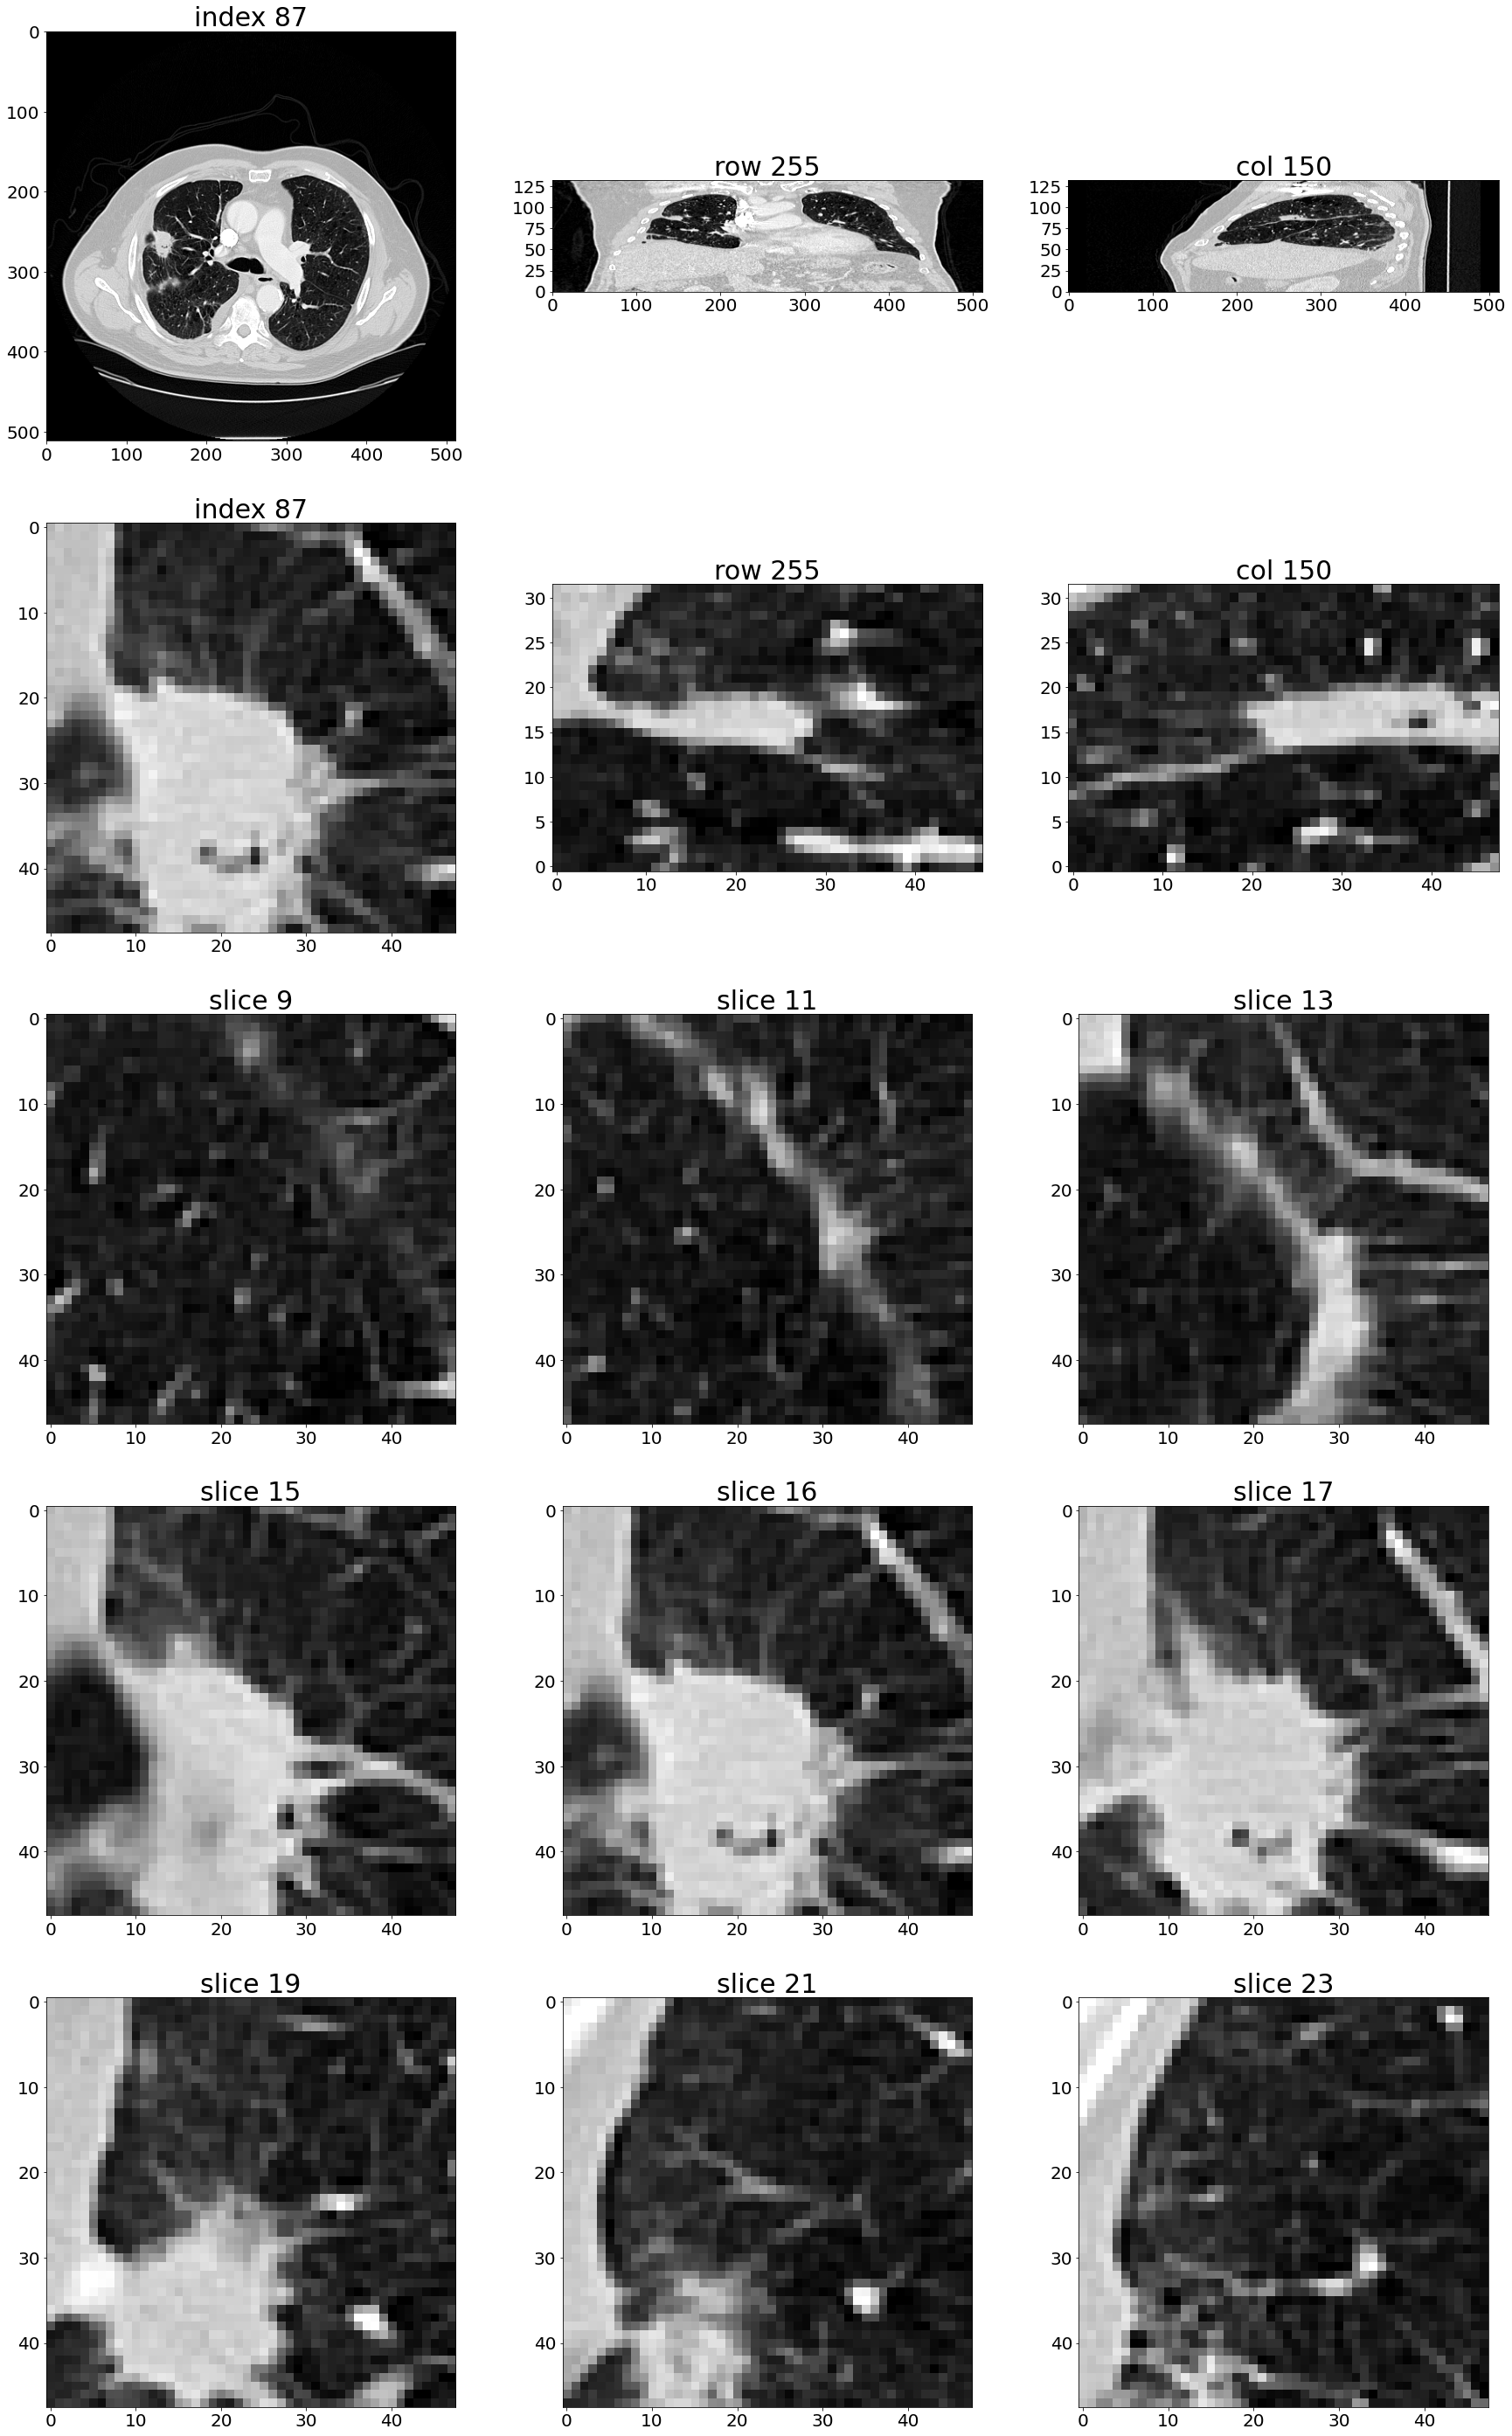

In [8]:
%matplotlib inline
print()
print()
# We have up to 100 samples bounded by the function findPositiveSamples
series_uid = positiveSample_list[11][2]#subset8
# If not all the datasets are present on disk, index error occurs
# TODO: 
# + function that match which cts are present from the original list

print(series_uid)

#series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565'
showCandidate(lunaDBPath, series_uid)

2022-03-21 08:43:51,698 INFO     pid:487075 p2ch10.dsets:217:__init__ <p2ch10.dsets.LunaDataset object at 0x7f68fcb4b130>: 1061 training samples


LunaDataset:  110460
1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565 0 False [0]


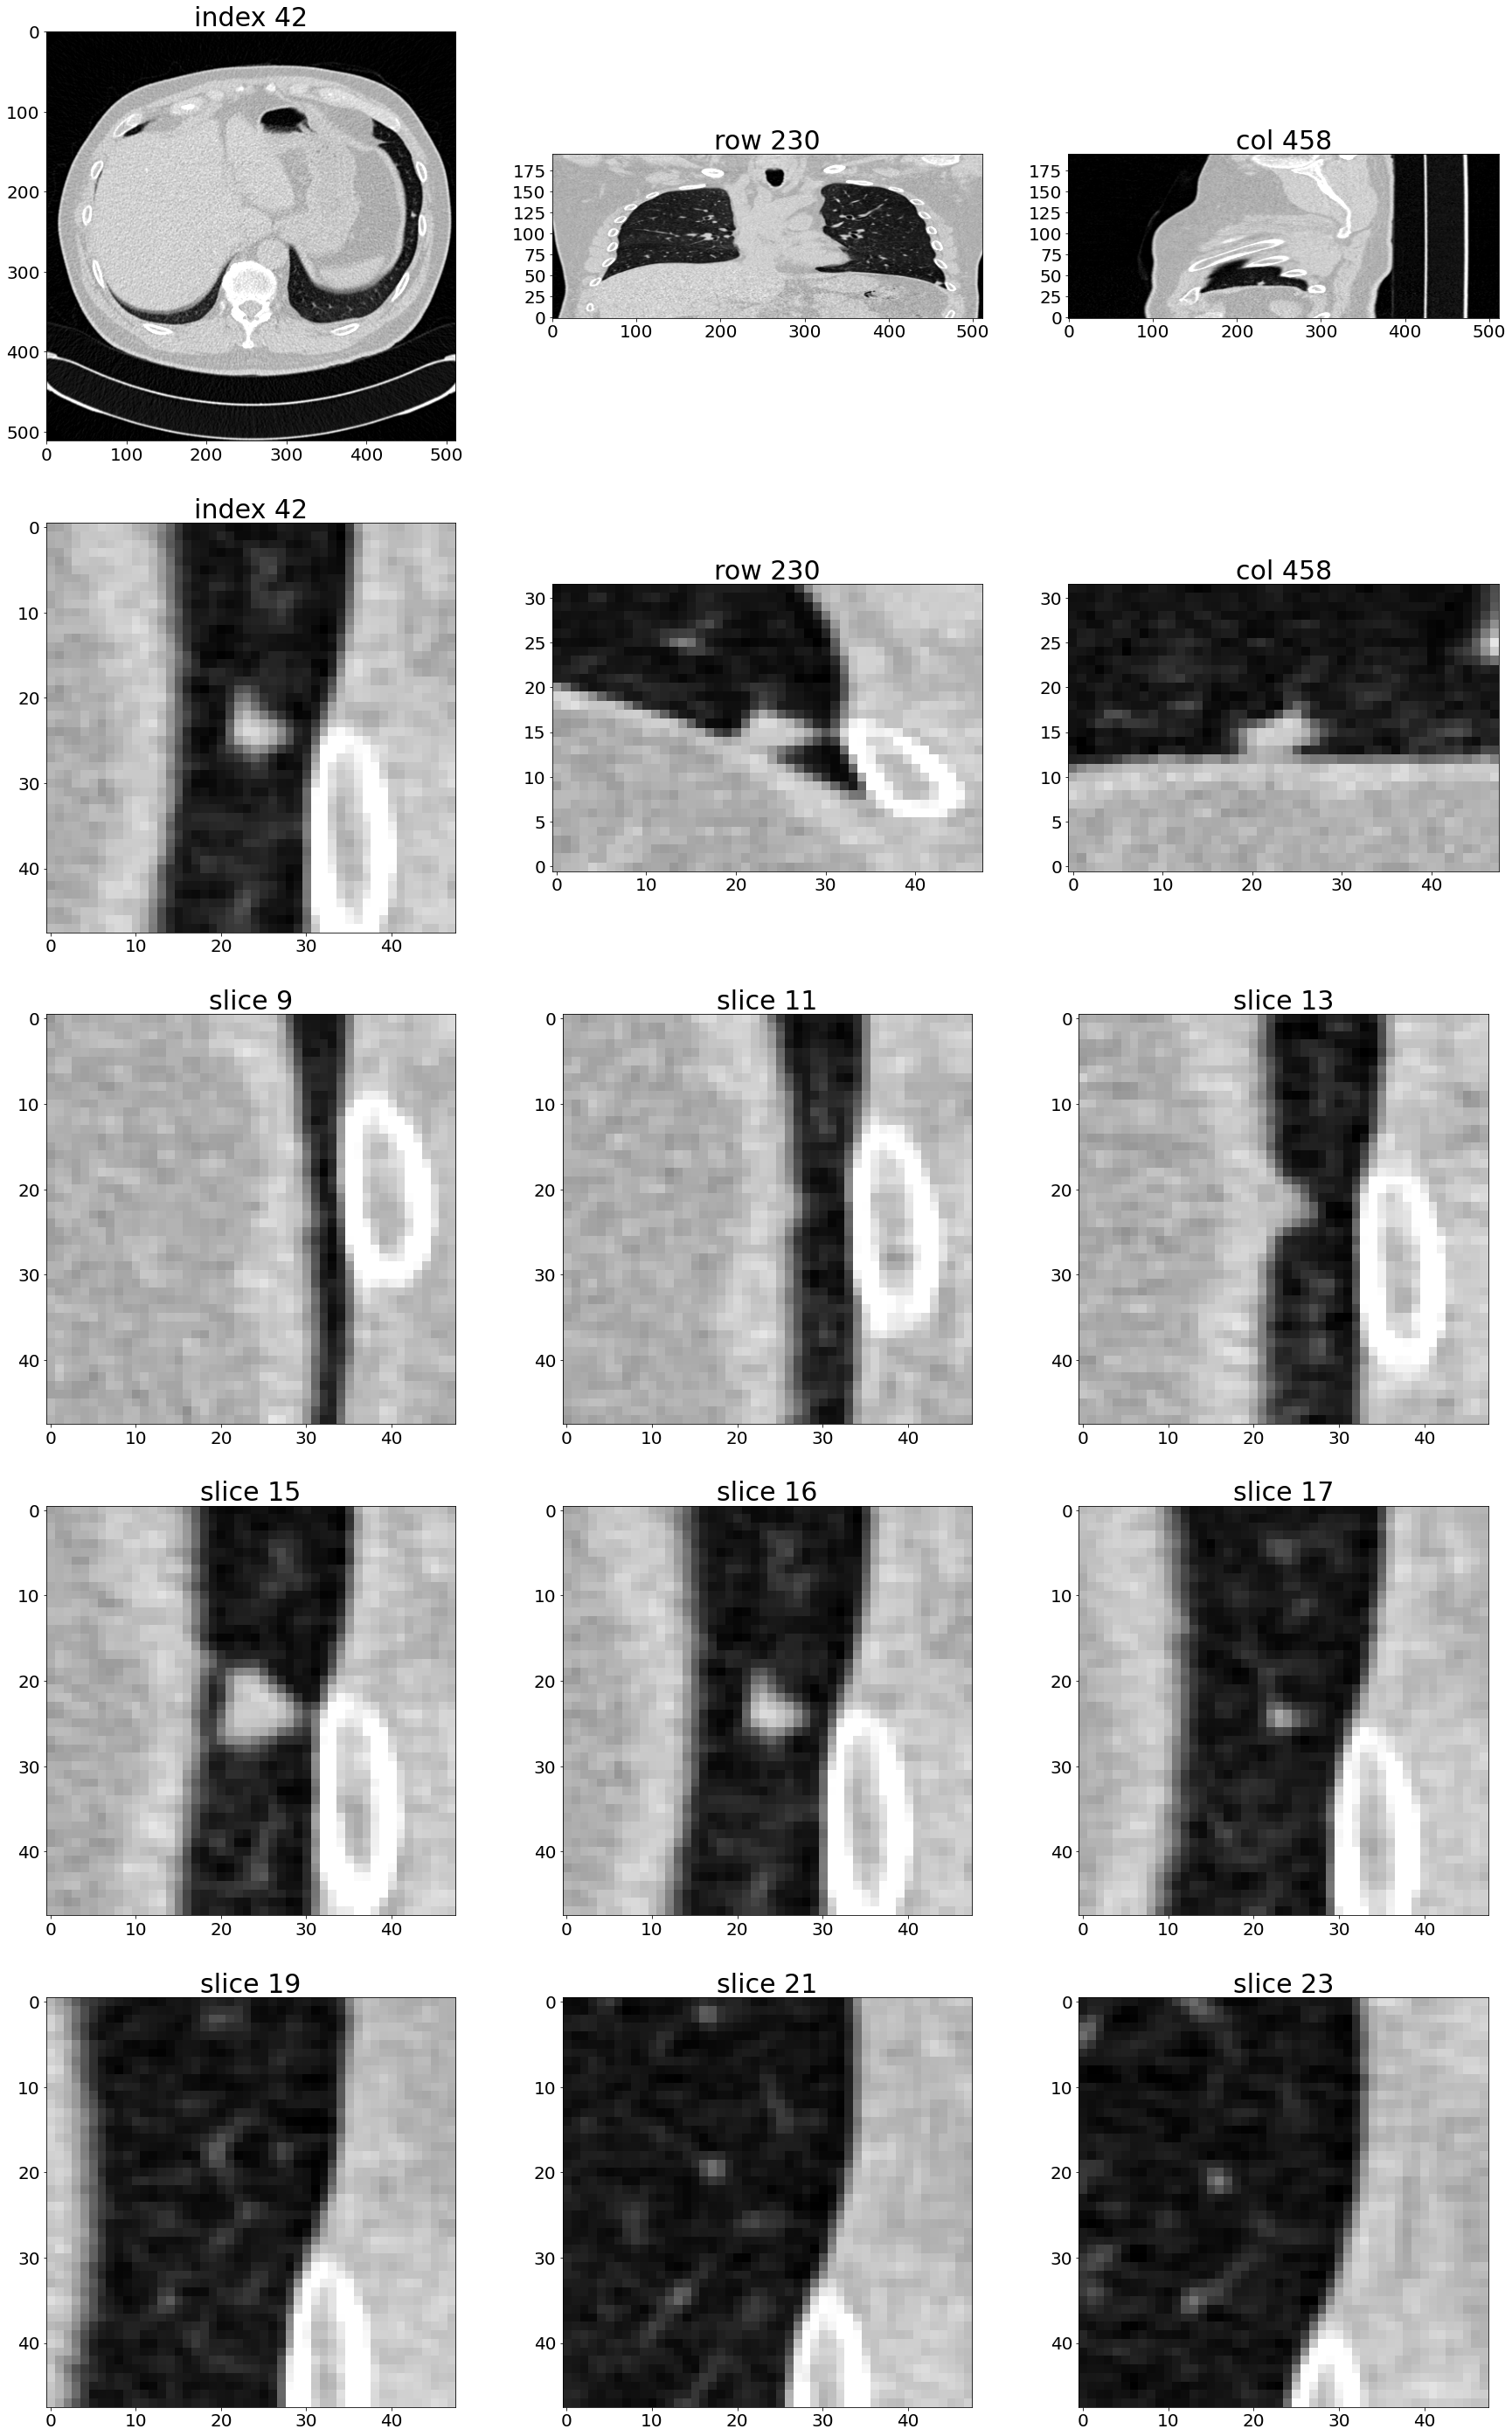

In [9]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565'
showCandidate(lunaDBPath, series_uid)

2022-03-21 08:43:53,688 INFO     pid:487075 p2ch10.dsets:217:__init__ <p2ch10.dsets.LunaDataset object at 0x7f6884f39c10>: 605 training samples


LunaDataset:  110460
1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354 0 False [0]


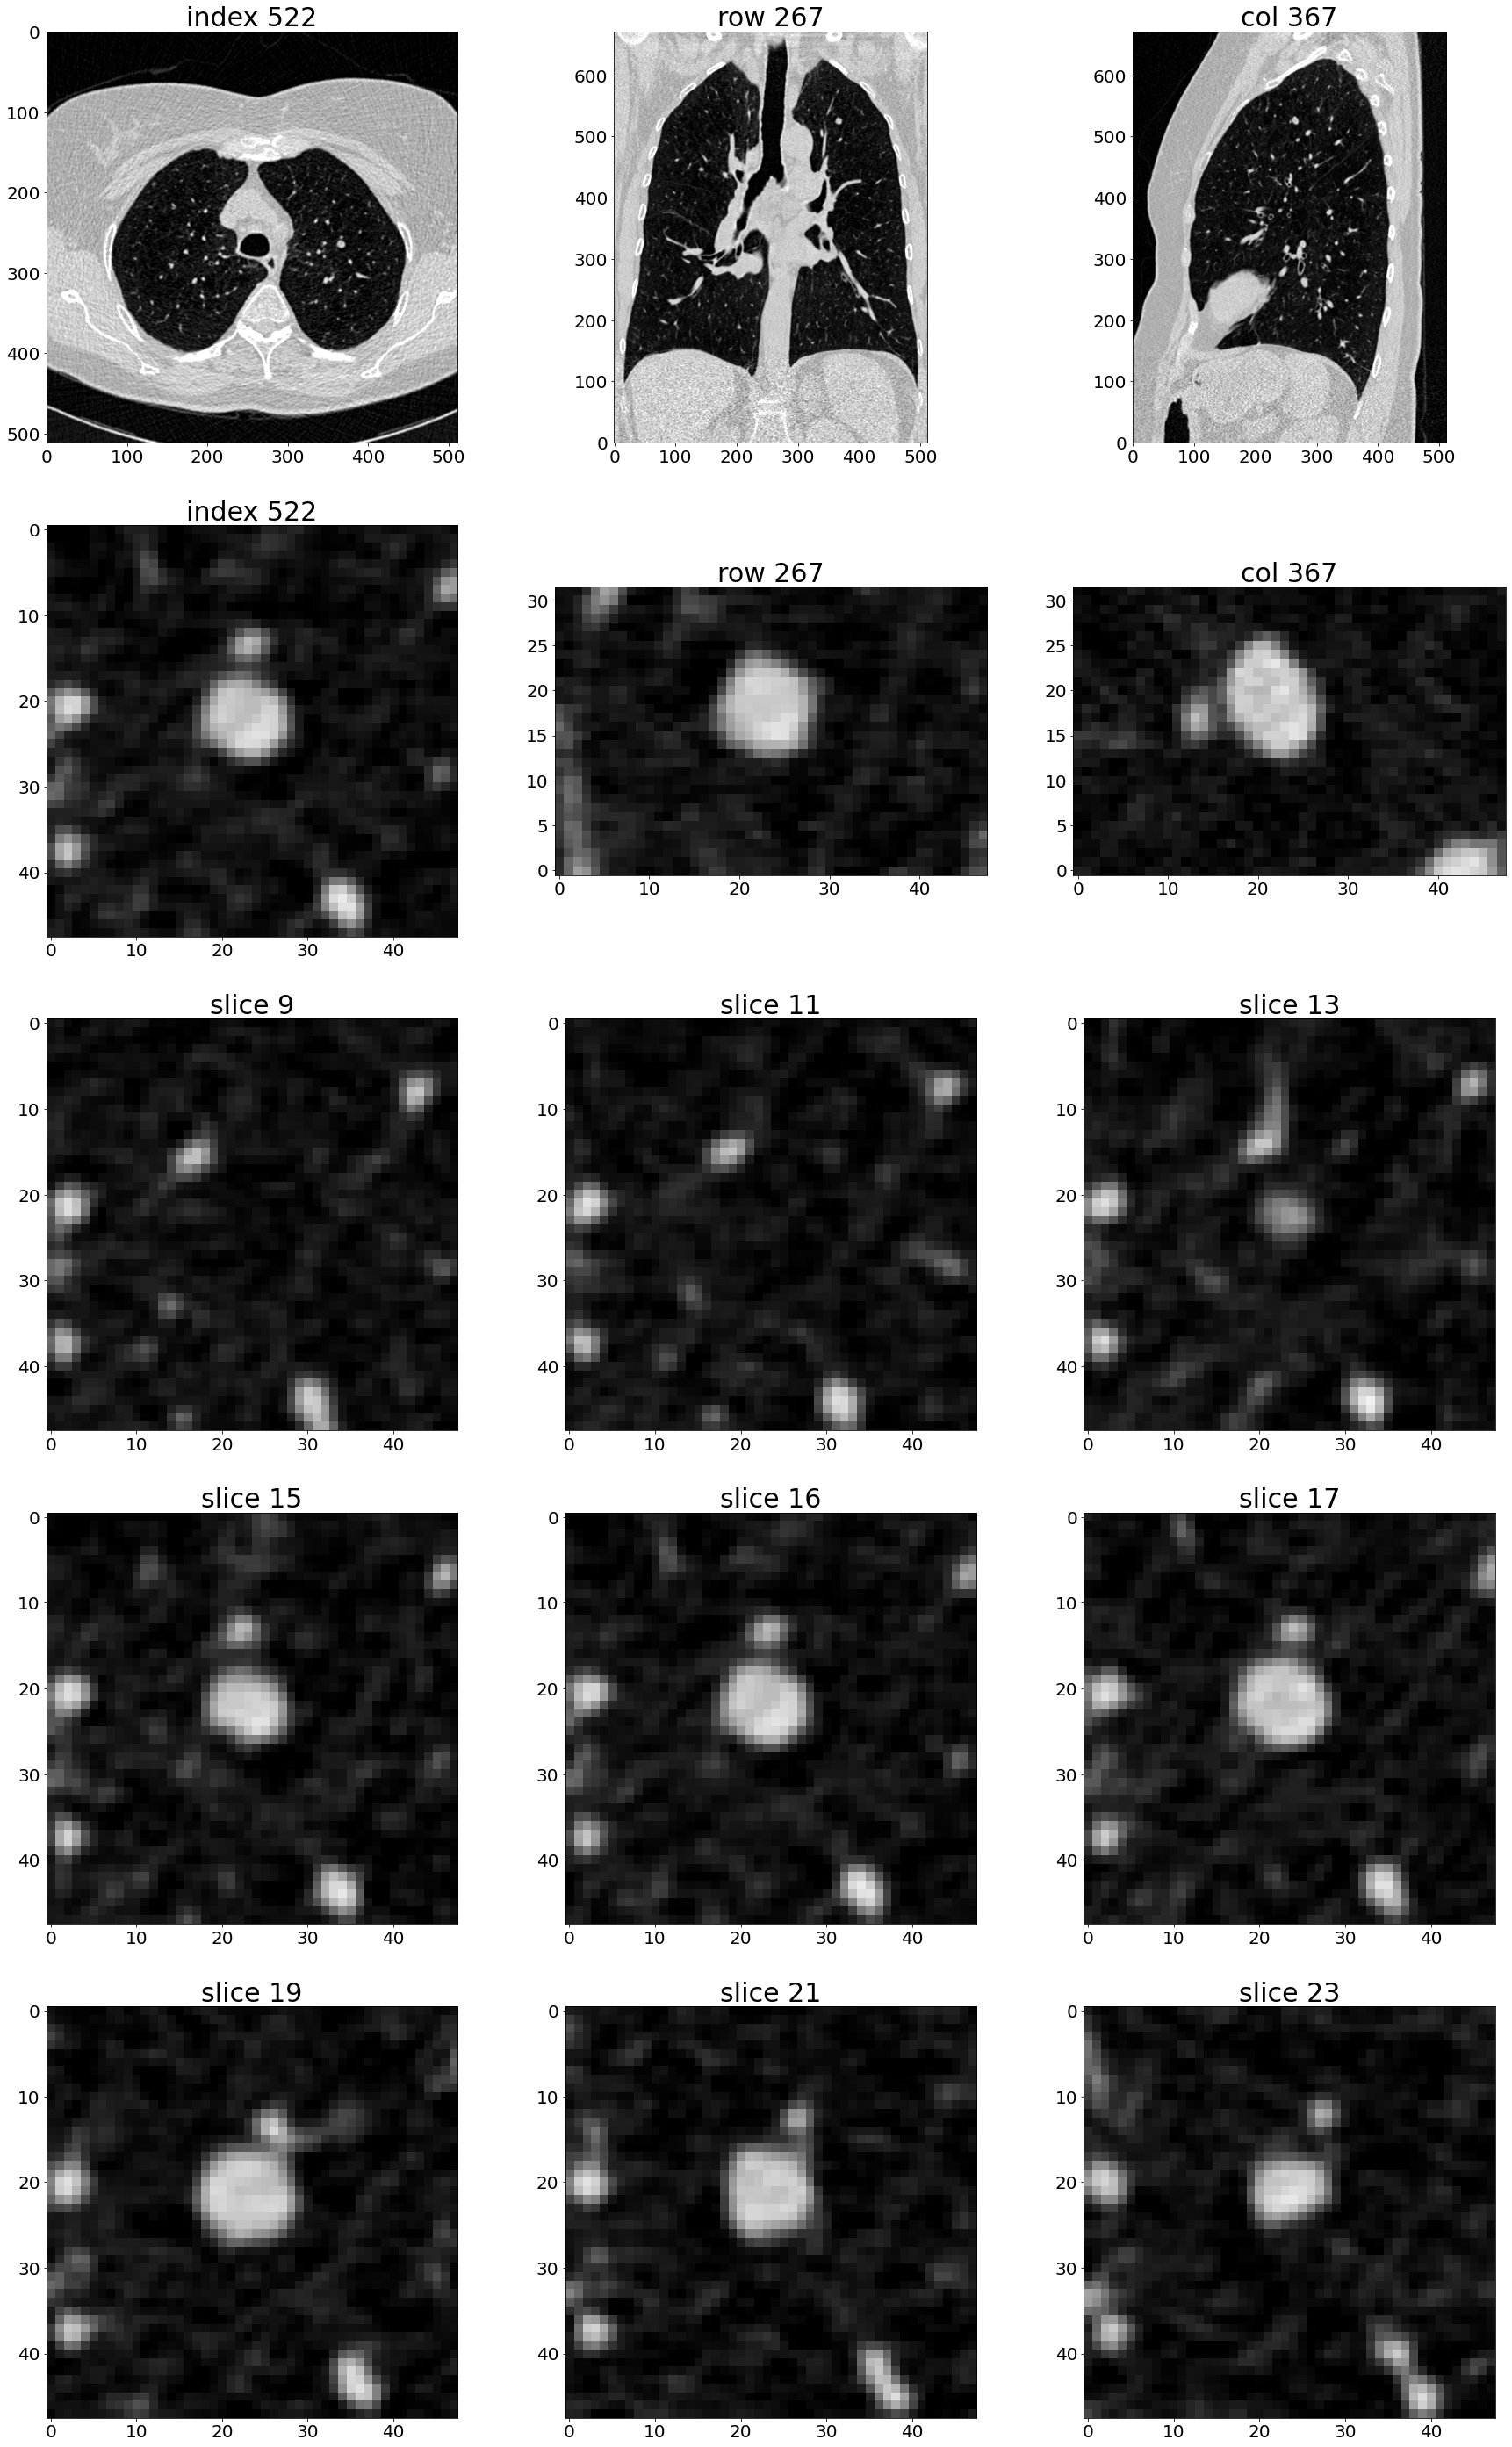

In [10]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354'
showCandidate(lunaDBPath, series_uid)

In [11]:
LunaDataset(lunaDBPath)[0]

2022-03-21 08:43:58,860 INFO     pid:487075 p2ch10.dsets:217:__init__ <p2ch10.dsets.LunaDataset object at 0x7f687eeca6a0>: 110460 training samples


LunaDataset:  110460


(tensor([[[[  41.,   65.,   69.,  ..., -896., -900., -898.],
           [  67.,   70.,   62.,  ..., -889., -899., -916.],
           [  65.,   86.,   88.,  ..., -865., -875., -903.],
           ...,
           [-803., -812., -839.,  ..., -843., -847., -839.],
           [-840., -842., -848.,  ..., -824., -830., -817.],
           [-831., -839., -849.,  ..., -818., -817., -809.]],
 
          [[  48.,   42.,   22.,  ..., -880., -879., -874.],
           [  61.,   47.,   12.,  ..., -899., -885., -882.],
           [  42.,   39.,   -1.,  ..., -909., -909., -887.],
           ...,
           [-853., -867., -872.,  ..., -859., -855., -886.],
           [-879., -890., -871.,  ..., -867., -862., -880.],
           [-880., -874., -842.,  ..., -882., -866., -860.]],
 
          [[ -30., -109., -195.,  ..., -874., -883., -871.],
           [ -97., -165., -232.,  ..., -892., -895., -882.],
           [-117., -196., -259.,  ..., -890., -902., -893.],
           ...,
           [-874., -884., -913.

In [12]:
import ipyvolume as ipv
# ipv doesn't show img using jupyter-lab, works well from jupyter notebook command 
print(series_uid)
ct = getCt(lunaDBPath, series_uid)
ipv.quickvolshow(ct.hu_a, level=[0.25, 0.5, 0.9], opacity=0.1, level_width=0.1, data_min=-1000, data_max=1000)

1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354


/users/renex/workspace/devTools/anaconda3/envs/pytorch-dlwpt/lib/python3.8/site-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/users/renex/workspace/devTools/anaconda3/envs/pytorch-dlwpt/lib/python3.8/site-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2
/users/renex/workspace/devTools/anaconda3/envs/pytorch-dlwpt/lib/python3.8/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value 

# Note: the following visualization doesn't look very good.
It's only included here for completeness. 

In [13]:
import scipy.ndimage.morphology
def build2dLungMask(ct, mask_ndx, threshold_gcc = 0.7):
    dense_mask = ct.hu_a[mask_ndx] > threshold_gcc
    denoise_mask = scipy.ndimage.morphology.binary_closing(dense_mask, iterations=2)
    tissue_mask = scipy.ndimage.morphology.binary_opening(denoise_mask, iterations=10)
    body_mask = scipy.ndimage.morphology.binary_fill_holes(tissue_mask)
    air_mask = scipy.ndimage.morphology.binary_fill_holes(body_mask & ~tissue_mask)

    lung_mask = scipy.ndimage.morphology.binary_dilation(air_mask, iterations=2)

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask


def build3dLungMask(ct):
    air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = mask_list = \
        [np.zeros_like(ct.hu_a, dtype=np.bool) for _ in range(6)]

    for mask_ndx in range(ct.hu_a.shape[0]):
        for i, mask_ary in enumerate(build2dLungMask(ct, mask_ndx)):
            mask_list[i][mask_ndx] = mask_ary

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask

In [ ]:
from p2ch10.dsets import getCt
ct = getCt(lunaDBPath, series_uid)
air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = build3dLungMask(ct)


/tmp/ipykernel_487075/2460116618.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [np.zeros_like(ct.hu_a, dtype=np.bool) for _ in range(6)]
/tmp/ipykernel_487075/2460116618.py:4: DeprecationWarning: Please use `binary_closing` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  denoise_mask = scipy.ndimage.morphology.binary_closing(dense_mask, iterations=2)
/tmp/ipykernel_487075/2460116618.py:5: DeprecationWarning: Please use `binary_opening` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  tissue_mask = scipy.ndimage.morphology.binary_opening(denoise_mask, iterations=10)
/tmp/

In [ ]:
bones = ct.hu_a * (ct.hu_a > 1.5)
lungs = ct.hu_a * air_mask
ipv.figure()
ipv.pylab.volshow(bones + lungs, level=[0.17, 0.17, 0.23], data_min=100, data_max=900)
ipv.show()

In [ ]:
import numpy as np

V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)
